In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
# Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load Dataset
df = pd.read_csv('googleplaystore.csv')

In [ ]:
# Basic Exploration
print(df.head())
print(df.info())
print(df.describe())

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

In [ ]:
# Remove problematic row
df.drop(10472, axis=0, inplace=True)

In [ ]:
# Data Cleaning
df['Reviews'] = df['Reviews'].astype('int')
df['Size'].replace('Varies with device', np.nan, inplace=True)

In [ ]:
# Convert Size to bytes
def convert_size(size):
    if isinstance(size, str):
        if 'M' in size:
            return float(size.replace('M', '')) * 1024 * 1024
        elif 'k' in size:
            return float(size.replace('k', '')) * 1024
    return np.nan

df['Size_in_bytes'] = df['Size'].apply(convert_size)


In [ ]:
# Clean Installs column
df['Installs'] = df['Installs'].str.replace('+', '').str.replace(',', '').astype('int')


In [ ]:
# Create Install Categories
bins = [-1, 0, 10, 1000, 10000, 100000, 1000000, 10000000, 1000000000]
labels = ['no', 'Very low', 'Low', 'Moderate', 'More than moderate', 'High', 'Very High', 'Top Notch']
df['Installs_category'] = pd.cut(df['Installs'], bins=bins, labels=labels)

In [ ]:
# Clean Price
df['Price'] = df['Price'].str.replace('$', '').astype('float')

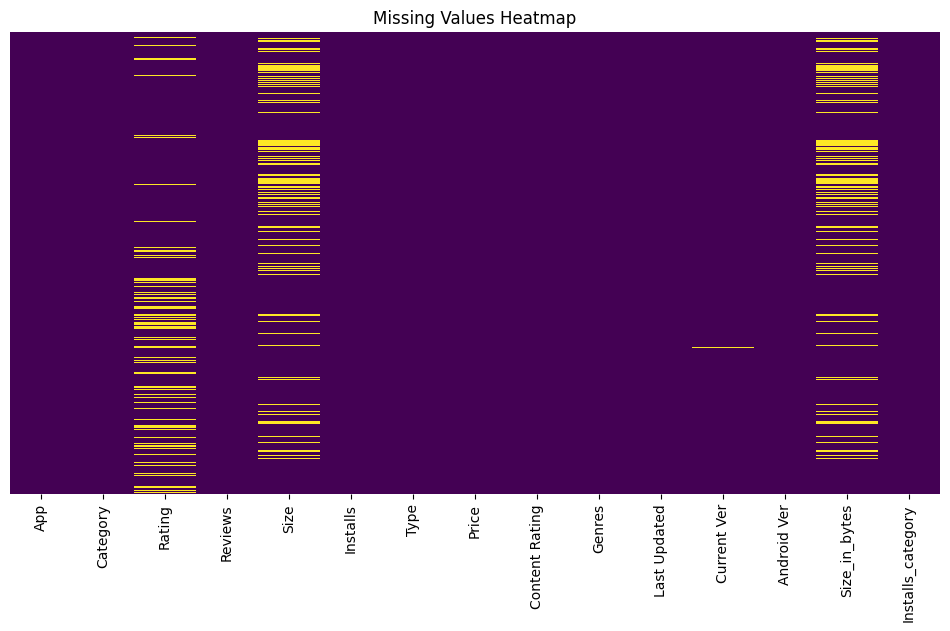

In [ ]:
# Missing Values Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [ ]:
# Handling Missing Ratings by Group
fill_values = df.groupby('Installs_category')['Rating'].mean()
for category in fill_values.index:
    df.loc[(df['Installs_category'] == category) & (df['Rating'].isnull()), 'Rating'] = fill_values[category]

In [ ]:
# Remove remaining missing values and duplicates
df.dropna(subset=['Current Ver', 'Android Ver', 'Type', 'Category', 'Genres'], inplace=True)
df.drop_duplicates(inplace=True)


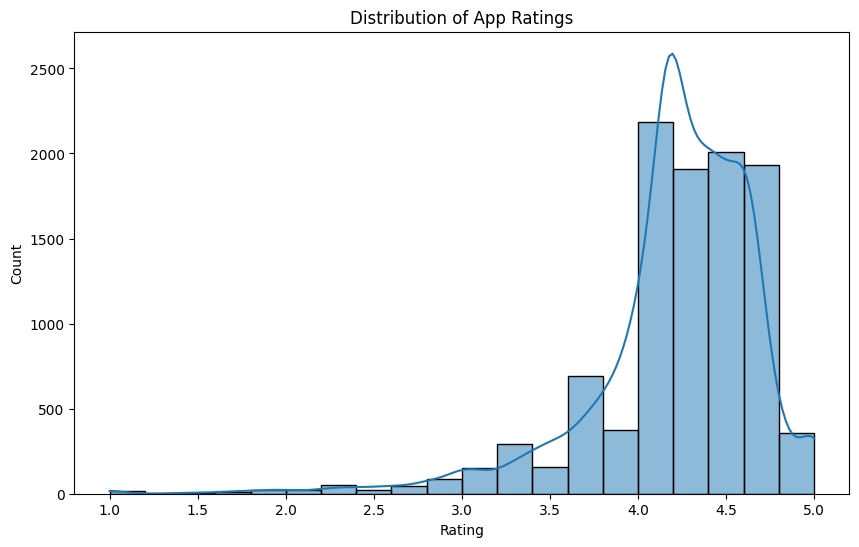

In [ ]:
# EDA Visualizations
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of App Ratings')
plt.show()

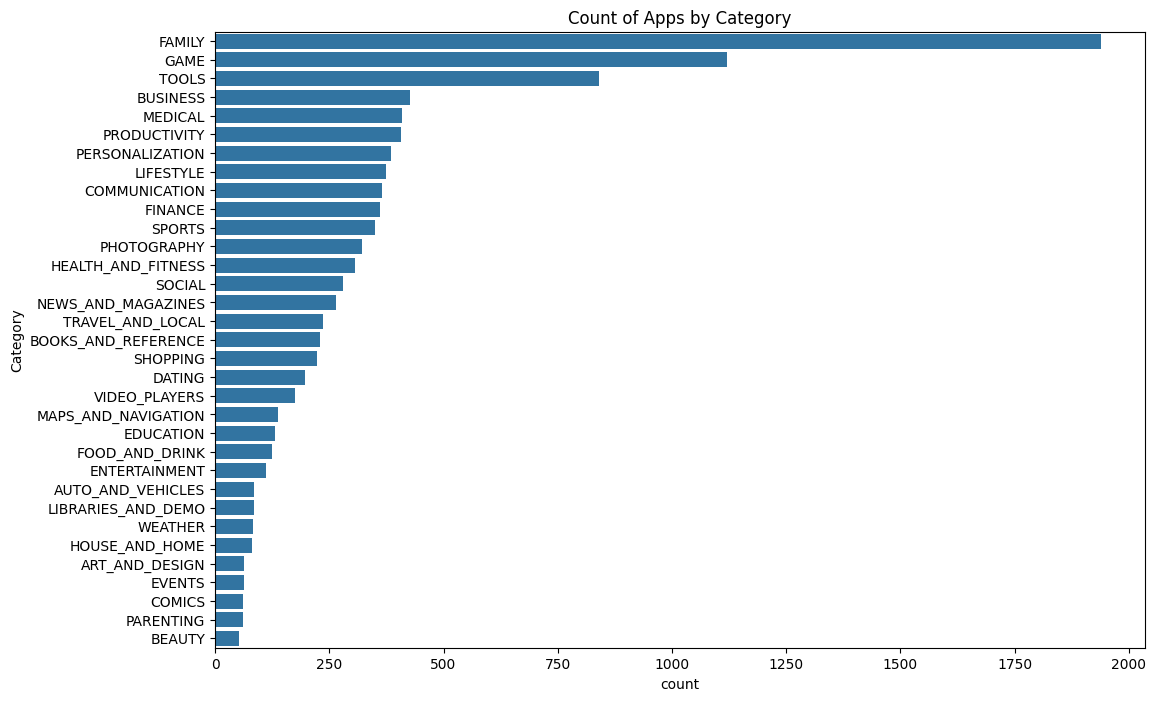

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index)
plt.title('Count of Apps by Category')
plt.show()

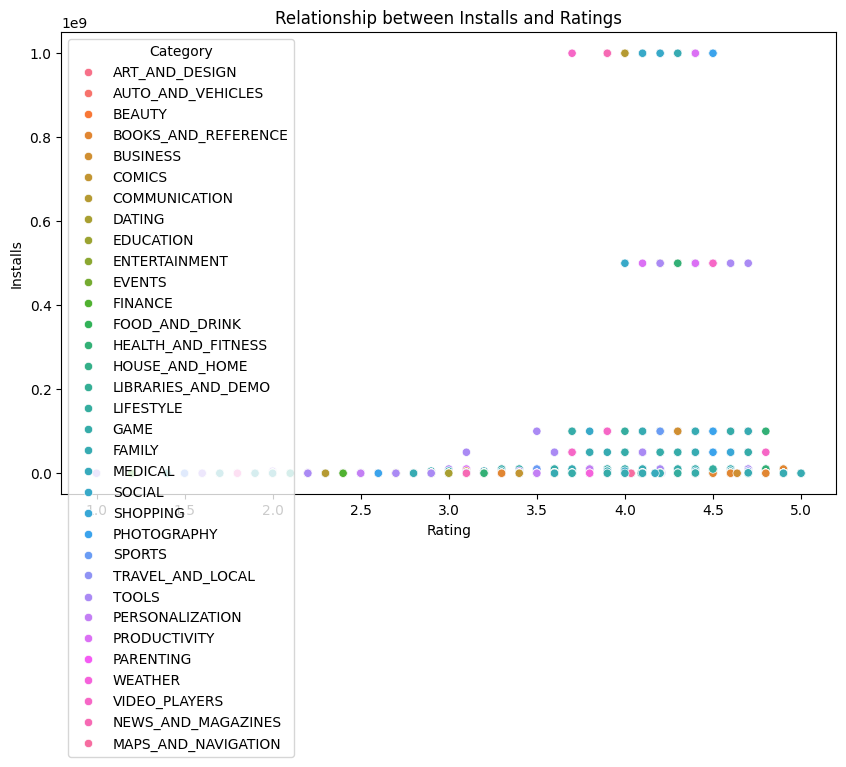

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y='Installs', hue='Category', data=df)
plt.title('Relationship between Installs and Ratings')
plt.show()

In [ ]:
# Pearson Correlation
pearson_r, _ = stats.pearsonr(df['Reviews'], df['Installs'])
print(f"Pearson's R between Reviews and Installs: {pearson_r:.4f}")

Pearson's R between Reviews and Installs: 0.6350


In [ ]:
# Insights
print("\nTop 10 App Categories by Count:\n", df['Category'].value_counts().head(10))
print("\nTop 10 Categories by Installs:\n", df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10))
print("\nTop 10 Categories by Reviews:\n", df.groupby('Category')['Reviews'].sum().sort_values(ascending=False).head(10))
print("\nTop 10 Categories by Average Rating:\n", df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10))



Top 10 App Categories by Count:
 Category
FAMILY             1939
GAME               1121
TOOLS               841
BUSINESS            427
MEDICAL             408
PRODUCTIVITY        407
PERSONALIZATION     386
LIFESTYLE           373
COMMUNICATION       366
FINANCE             360
Name: count, dtype: int64

Top 10 Categories by Installs:
 Category
GAME                  31544024415
COMMUNICATION         24152276251
SOCIAL                12513867902
PRODUCTIVITY          12463091369
TOOLS                 11452271905
FAMILY                10041632405
PHOTOGRAPHY            9721247655
TRAVEL_AND_LOCAL       6361887146
VIDEO_PLAYERS          6222002720
NEWS_AND_MAGAZINES     5393217760
Name: Installs, dtype: int64

Top 10 Categories by Reviews:
 Category
GAME               1415536650
COMMUNICATION       601273552
SOCIAL              533576829
FAMILY              396771746
TOOLS               273181033
PHOTOGRAPHY         204297410
VIDEO_PLAYERS       110380188
PRODUCTIVITY        102554498